# <h1><center>LDA and SVM Algorithm</center></h1>

# <h1><center>Yongheng Zhang</center></h1>

In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
from scipy.linalg import sqrtm

# <h1><center>Question 1</center></h1>

# 1.1 LDA training algorithm

In [2]:
def LDATrain(Y,X,q):
    r = q-1 #default
    glob_avg = X.mean().values.reshape(-1,1) #mu_bar
    classes = np.sort(Y.unique()) #unique class labels
    w = 0
    b = 0
    class_avgs = [] #mu_g: there will be q small lists inside
    for i in classes:
        class_index = Y[Y == i].index
        X_class = X.iloc[class_index] #df_x corrsponding to a particular class
        class_avg = X_class.mean().values.reshape(-1,1) #class avg dx1
        class_avgs.append(class_avg) #append to list
        C_g = X_class.shape[0]/X.shape[0] #calculate c_g = N_g/N
        
        for i in range(X_class.shape[0]):
            w += np.dot((X_class.iloc[i].values.reshape(-1,1) - class_avg),(X_class.iloc[i].values.reshape(-1,1) \
                                                                            - class_avg).T)
        b += C_g* np.dot((class_avg - glob_avg),(class_avg - glob_avg).T)
        
    w/=X.shape[0]
    
    wb = np.dot(LA.inv(w),b)
    v,V = LA.eig(wb)
    for i in range(V.shape[0]):
        V[:,i] = V[:,i]/np.sqrt(V[:,i].T@w@V[:,i]) 
    #V = np.dot(sqrtm(LA.inv(w)),V)  
    eig_vals = np.argsort(v)[::-1][:r] 
    V = V[:,eig_vals]
    #print(V[:,0].T@w@V[:,0])
    #print(V[:,1].T@w@V[:,1])
    m_c = []
    for i in range(q):
        m_c.append(np.dot((class_avgs[i] - glob_avg).T,V))
    m_c = np.vstack(m_c)
    return V,m_c,glob_avg

# 1.2 LDA Classification Algorithm

In [3]:
def LDAclassify(X,V,m_c,glob_avg):
    total = []
    for j in range(m_c.shape[0]):#q
        first_term = 0
        second_term = 0
        third_term = math.log(1/m_c.shape[0])
        for i in range(V.shape[1]):#r
            gamma_x = np.dot((X.values - glob_avg.T) , V[:,i].reshape(-1,1))
            gamma_mu = m_c[j][i]
            first_term += gamma_x*gamma_mu 
            second_term += gamma_mu**2
        total.append(first_term - 1/2*second_term + third_term)
    mat = np.hstack(total)
    df = pd.DataFrame(mat)
    M = df.idxmax(axis = 1) + 1  
    return M

# 1.3 Test the Algorithms Above. 

In [4]:
LDA1 = pd.read_csv('LDA_1.csv',header = None)
N = [20, 50, 100, 200, 1000, 2500]
#training set contains the N first samples in the file, and the test set contains the 5000 − N remaining ones

for i in N:
    X_train = LDA1.iloc[:i,1:]
    Y_train = LDA1.iloc[:i,0]
    X_test = LDA1.iloc[i:,1:]
    Y_test = LDA1.iloc[i:,0]
    
    q = len(Y_train.unique())
    V,m_c,glob_avg = LDATrain(Y_train,X_train,q)
    M_train = LDAclassify(X_train,V,m_c,glob_avg)
    M_test = LDAclassify(X_test,V,m_c,glob_avg)

    train_err = sum(M_train != Y_train)/X_train.shape[0]
    test_err = sum(M_test != Y_test.reset_index(drop = True))/X_test.shape[0]
    print('When N is {}:\n The training misclassification rates is {}, \n The test misclassification rates is {}'\
          .format(i,train_err,test_err))
    print()

When N is 20:
 The training misclassification rates is 0.0, 
 The test misclassification rates is 0.05883534136546185

When N is 50:
 The training misclassification rates is 0.0, 
 The test misclassification rates is 0.028686868686868688

When N is 100:
 The training misclassification rates is 0.0, 
 The test misclassification rates is 0.025918367346938774

When N is 200:
 The training misclassification rates is 0.025, 
 The test misclassification rates is 0.020416666666666666

When N is 1000:
 The training misclassification rates is 0.019, 
 The test misclassification rates is 0.01975

When N is 2500:
 The training misclassification rates is 0.0188, 
 The test misclassification rates is 0.0176



# 1.3 Input Variables of the Test Set Projected on the First Two Discriminant Directions

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


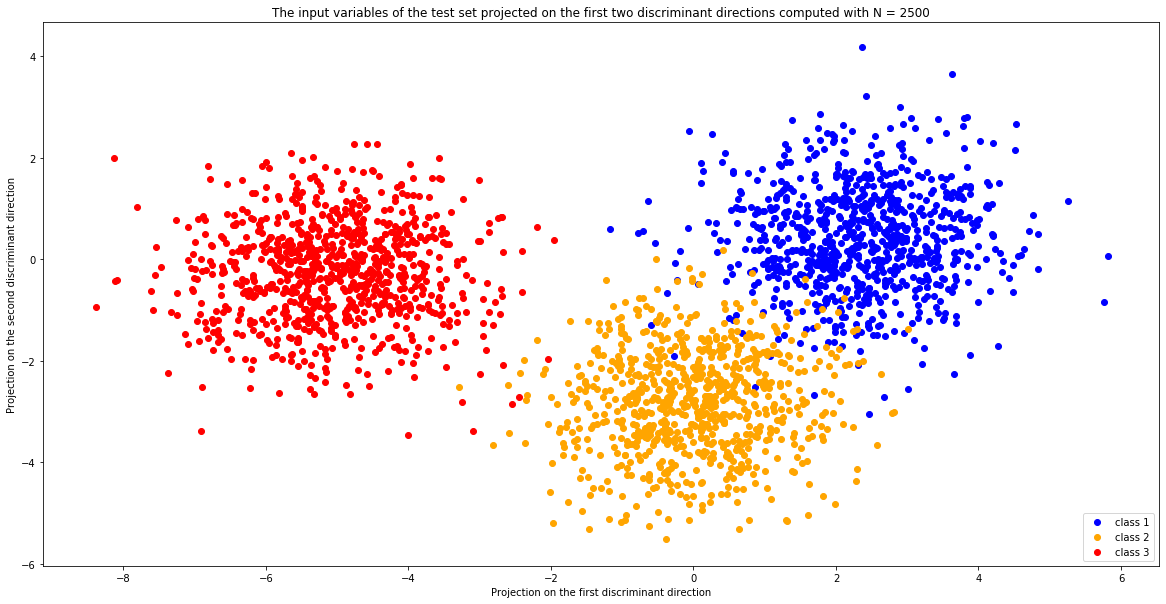

In [5]:
X_train = LDA1.iloc[:2500,1:]
Y_train = LDA1.iloc[:2500,0]
X_test = LDA1.iloc[2500:,1:]
Y_test = LDA1.iloc[2500:,0]
    
q = len(Y_train.unique())
V,m_c,glob_avg = LDATrain(Y_train,X_train,q)
proj_classes = []
for i in range(1,q+1):
    class_i = Y_test[Y_test == i].index
    X_class = X_test.loc[class_i]
    proj_classes.append(X_class@V)

plt.figure(figsize=(20,10))
plt.scatter(proj_classes[0][0],proj_classes[0][1], c= 'blue' , label = 'class 1')
plt.scatter(proj_classes[1][0],proj_classes[1][1], c='orange', label = 'class 2')
plt.scatter(proj_classes[2][0],proj_classes[2][1], c='red', label = 'class 3')
plt.title('The input variables of the test set projected on the first two discriminant directions computed with N = 2500')
plt.xlabel('Projection on the first discriminant direction')
plt.ylabel('Projection on the second discriminant direction')
plt.legend(loc = 4)
plt.show()

# 1.4 Test the LDA Algorithms with Different Dataset

In [6]:
LDA3 = pd.read_csv('LDA_3.csv',header = None)
LDA3

,0,1,2,3,4,5,6,7,8,9,10
0,1,0.38307,-0.12043,1.708900,0.691760,-0.57576,1.271700,-1.03090,-0.958510,1.65190,0.910890
1,1,-1.34000,0.34832,-0.996100,-1.515000,-0.93728,-0.069454,-1.94310,0.251390,-0.90311,-0.231980
2,1,-1.30700,-1.18100,-0.271540,-0.509030,-0.84604,1.626900,0.23891,-1.770100,-0.74735,-0.868390
3,3,-3.74000,-0.64280,0.217040,-0.436960,-3.87570,0.401010,-0.35295,-2.708400,-0.82935,2.712700
4,1,0.53775,-0.27917,-0.444260,-0.019871,-2.26140,-0.381270,-1.16250,-1.140400,0.53479,1.526200
...,...,...,...,...,...,...,...,...,...,...,...
4995,2,-1.31130,1.29160,-1.218100,1.904900,-3.57100,-1.464600,1.87140,-1.334100,-2.29180,1.633000
4996,2,0.92368,1.25660,0.308400,-2.249100,-0.25727,-4.993200,-0.90213,-0.482010,1.15540,-0.010272
4997,1,-0.60276,-1.87330,-0.078947,-0.765090,-2.08860,0.406290,0.52184,-1.631800,-0.10011,-0.213210
4998,2,-2.81030,1.67700,1.691900,-0.366310,3.11170,0.424260,1.96370,0.018454,-2.13340,-1.923000


When N is 2500, the test misclassification rates is 0.6028



/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


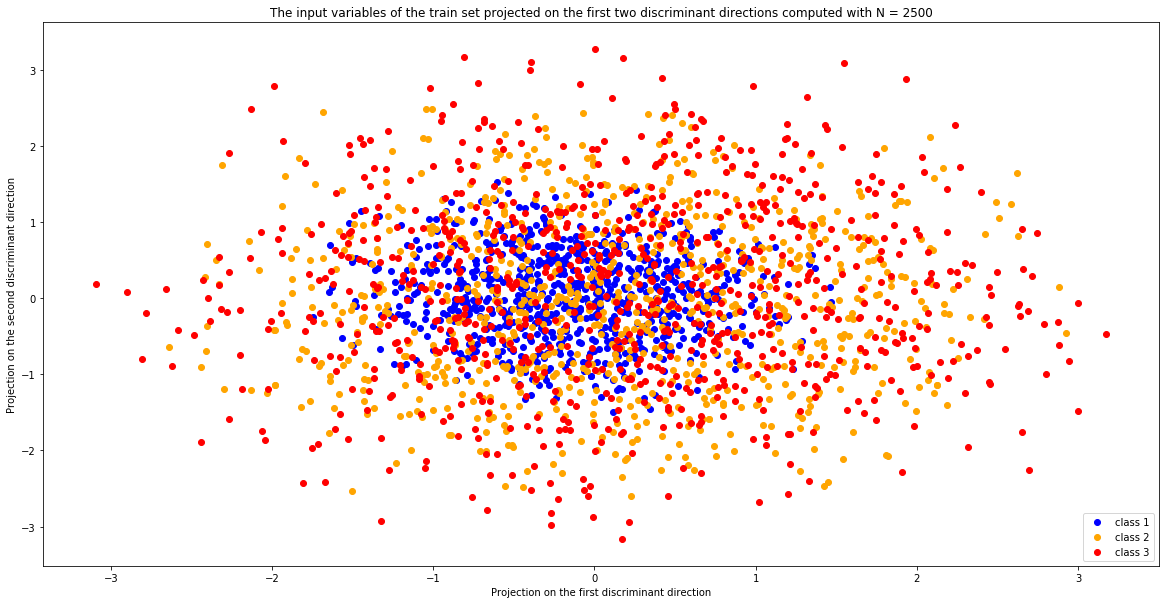

In [7]:
i = 2500
X_train = LDA3.iloc[:i,1:]
Y_train = LDA3.iloc[:i,0]
X_test = LDA3.iloc[i:,1:]
Y_test = LDA3.iloc[i:,0]
    
q = len(Y_train.unique())
V,m_c,glob_avg = LDATrain(Y_train,X_train,q)
M_test = LDAclassify(X_test,V,m_c,glob_avg)
test_err = sum(M_test != Y_test.values)/X_test.shape[0]
print('When N is 2500, the test misclassification rates is {}'.format(test_err))
print()

proj_classes = []
for i in range(1,q+1):
    class_i = Y_train[Y_train == i].index
    X_class = X_train.loc[class_i]
    proj_classes.append(X_class@V)

plt.figure(figsize=(20,10))
plt.scatter(proj_classes[0][0],proj_classes[0][1], c= 'blue' , label = 'class 1')
plt.scatter(proj_classes[1][0],proj_classes[1][1], c='orange', label = 'class 2')
plt.scatter(proj_classes[2][0],proj_classes[2][1], c='red', label = 'class 3')
plt.title('The input variables of the train set projected on the first two discriminant directions computed with N = 2500')
plt.xlabel('Projection on the first discriminant direction')
plt.ylabel('Projection on the second discriminant direction')
plt.legend(loc = 4)
plt.show()

# 1.5 Second LDA using both X and X^2 as Predicting Variables

In [8]:
X_square = LDA3.iloc[:,1:] **2
second_LDA = pd.concat([LDA3,X_square],axis = 1)
second_LDA.shape

(5000, 21)

When N is 2500, the test misclassification rates is 0.0



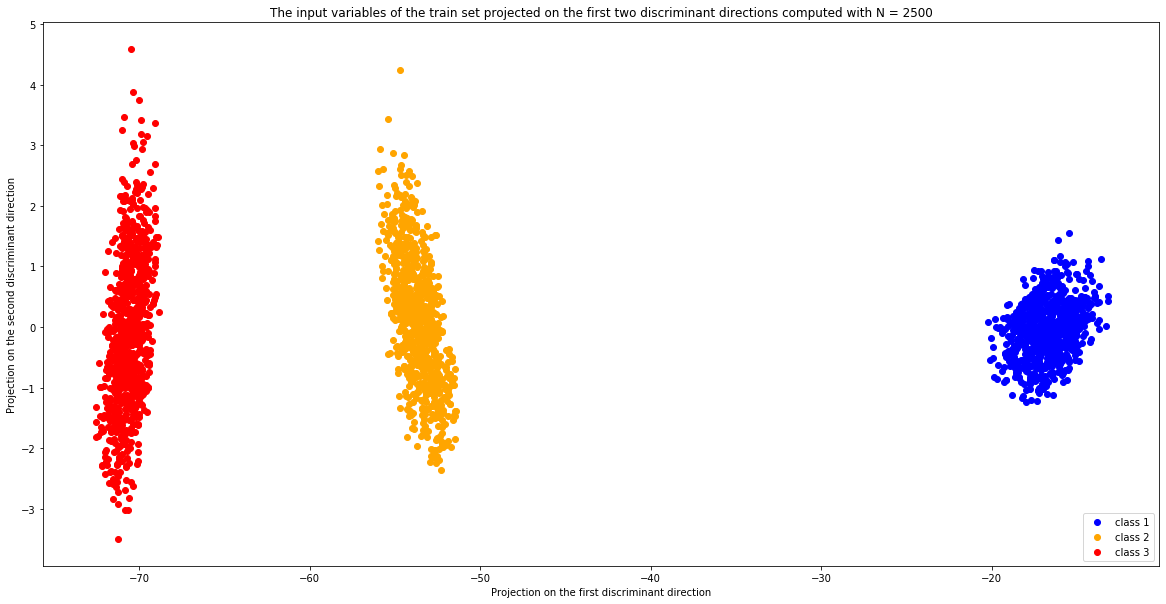

In [9]:
i = 2500
X_train = second_LDA.iloc[:i,1:]
Y_train = second_LDA.iloc[:i,0]
X_test = second_LDA.iloc[i:,1:]
Y_test = second_LDA.iloc[i:,0]
    
q = len(Y_train.unique())
V,m_c,glob_avg = LDATrain(Y_train,X_train,q)
M_test = LDAclassify(X_test,V,m_c,glob_avg)
test_err = sum(M_test != Y_test.values)/X_test.shape[0]
print('When N is 2500, the test misclassification rates is {}'.format(test_err))
print()

proj_classes = []
for i in range(1,q+1):
    class_i = Y_train[Y_train == i].index
    X_class = X_train.loc[class_i]
    proj_classes.append(X_class@V)

plt.figure(figsize=(20,10))
plt.scatter(proj_classes[0][0],proj_classes[0][1], c= 'blue' , label = 'class 1')
plt.scatter(proj_classes[1][0],proj_classes[1][1], c='orange', label = 'class 2')
plt.scatter(proj_classes[2][0],proj_classes[2][1], c='red', label = 'class 3')
plt.title('The input variables of the train set projected on the first two discriminant directions computed with N = 2500')
plt.xlabel('Projection on the first discriminant direction')
plt.ylabel('Projection on the second discriminant direction')
plt.legend(loc = 4)
plt.show()

# 2.1 Linear SVM in Primal Form with ADMM Algorithm

In [10]:
class2D = pd.read_csv('class_2D.csv')
class2D = class2D.drop(columns = ['Unnamed: 0'])
print('Shape of the data',class2D.shape)
class2D.head()

Shape of the data (50, 3)


,x1,x2,class
0,-1.274321,1.479208,-1.0
1,-1.166874,1.869513,-1.0
2,0.337623,2.650213,-1.0
3,-0.900788,0.993779,-1.0
4,-1.885389,0.571573,-1.0


In [11]:
def program5_1(X,Y,gamma,rho):
    N,d = X.shape
    I = np.identity(d)
    J = np.insert(I, 0, np.array((0)*d), 1)
    J = np.insert(J, 0, np.array((0)*d), 0)

    A = np.zeros((N,d+1))
    A[:,0] = Y
    for i in range(N):
        A[i,1:] = np.dot(Y[i],X.iloc[i].values.reshape(-1,1).T)  
    beta = np.ones((d+1,1))
    z = np.zeros((N,1))
    u = np.zeros((N,1))
    count = 1 
    while True:
        new_beta = 1/rho * np.dot(np.dot(LA.inv(J+1/rho*np.dot(A.T,A)),A.T),z-u)
        new_z = np.zeros((N,1))
        for i in range(z.shape[0]):
            long_term = u[i]+Y[i]*(new_beta[0]+ np.dot(X.iloc[i].values.reshape(-1,1).T,new_beta[1:]))
#             if z[i]>1:
#                 new_z[i] = long_term
#             elif z[i]<1:
#                 new_z[i] = long_term + (rho*gamma[i])  
#             else:
#                 new_z[i] = 1
            new_z[i] = max(long_term-1,0)+min(long_term-(1-rho*gamma[i]),0) +1
        new_u = u + np.dot(A,new_beta) - new_z
       
        #print(LA.norm(new_beta - beta))
        if LA.norm(new_beta - beta) <1e-06:
            return(count,new_beta[0],new_beta[1:])
        else:
            z = new_z
            u = new_u
            beta = new_beta   
            count += 1

In [12]:
X = class2D.iloc[:,0:2]
Y = class2D.iloc[:,2]
N,d = X.shape
IN = np.ones((N,1))
Gammas = [0.1*IN,0.5*IN,1*IN]
gammas = ['0.1*IN','0.5*IN','IN']
rho_vals = [1,1,1]
BETA0 = []
BETA = []
MARGIN = []
for i in range(len(Gammas)):
    count,beta0,beta = program5_1(X,Y,gamma = Gammas[i],rho = rho_vals[i])
    margin = 1/LA.norm(beta)
    BETA0.append(beta0)
    BETA.append(beta)
    MARGIN.append(margin)
    print('Gamma = {}, rho = {}'.format(gammas[i],rho_vals[i]))
    print('β0 \n {} \n \n b \n {}'.format(beta0,beta))
    print()
    print('The margin \n',margin)
    print()
    print('Number of iter takes is',count)
    print('------------------------------')

Gamma = 0.1*IN, rho = 1
β0 
 [0.73024809] 
 
 b 
 [[ 0.74436095]
 [-0.87363398]]

The margin 
 0.8712766573870158

Number of iter takes is 707
------------------------------
Gamma = 0.5*IN, rho = 1
β0 
 [1.00156143] 
 
 b 
 [[ 1.10695308]
 [-1.05672197]]

The margin 
 0.6534403618352793

Number of iter takes is 469
------------------------------
Gamma = IN, rho = 1
β0 
 [1.12323272] 
 
 b 
 [[ 1.25161783]
 [-1.11494943]]

The margin 
 0.5965861408799595

Number of iter takes is 529
------------------------------


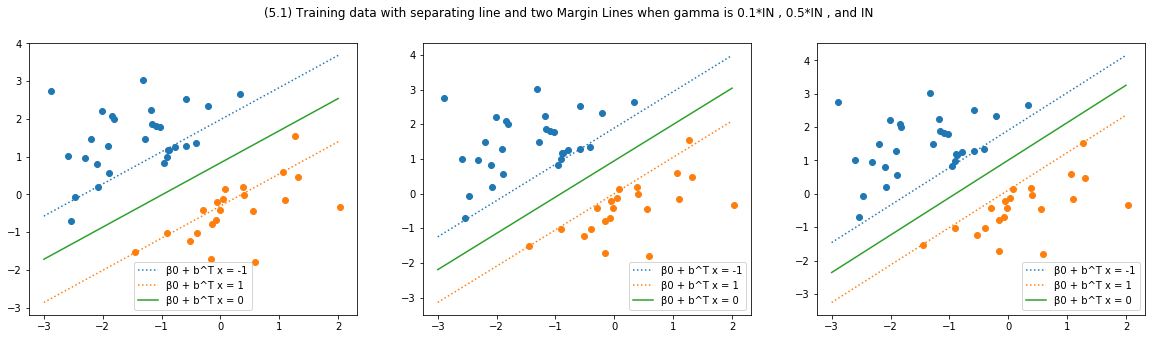

In [13]:
class_one = class2D[class2D.iloc[:,2] == -1]
class_two = class2D[class2D.iloc[:,2] == 1]

x11 = -3
x12 = 2

fig, axs = plt.subplots(1, 3,figsize=(20,5))
fig.suptitle('(5.1) Training data with separating line and two Margin Lines when gamma is 0.1*IN , 0.5*IN , and IN')
for i in range(3):
    x21_neg1 = (-1-BETA0[i] - BETA[i][0]*x11)/BETA[i][1]
    x22_neg1 = (-1-BETA0[i] - BETA[i][0]*x12)/BETA[i][1]

    x21_pos1 = (1-BETA0[i] - BETA[i][0]*x11)/BETA[i][1]
    x22_pos1 = (1-BETA0[i] - BETA[i][0]*x12)/BETA[i][1]

    x21_zero = (-BETA0[i] - BETA[i][0]*x11)/BETA[i][1]
    x22_zero = (-BETA0[i] - BETA[i][0]*x12)/BETA[i][1]

    axs[i].scatter(class_one.iloc[:,0],class_one.iloc[:,1])
    axs[i].scatter(class_two.iloc[:,0],class_two.iloc[:,1])
    axs[i].plot([x11,x12],[x21_neg1,x22_neg1],":" , label = 'β0 + b^T x = -1')
    axs[i].plot([x11,x12],[x21_pos1,x22_pos1],":", label = 'β0 + b^T x = 1')
    axs[i].plot([x11,x12],[x21_zero,x22_zero], label = 'β0 + b^T x = 0')
    axs[i].legend()

# 2.2 Linear SVM in Dual Form with ADMM Algorithm

In [14]:
def program5_2(X,Y,gamma,rho):
    K_y = np.zeros((len(X),len(X)))
    for i in range(len(X)):
        for xx in range(len(X)):
            K_y[xx,i] += Y[xx]*Y[i]*np.dot(X.iloc[xx,:].values.reshape(-1,1).T, X.iloc[i,:].values.reshape(-1,1))
    
    N,d = X.shape
    alpha = np.ones((N,1))
    z = np.zeros((N,1))
    u = np.zeros((N,1))
    
    ID = np.identity(N)
    IN = np.ones((N,1))
    zero = np.zeros((N,1))
    count = 1 
    while True:       
        first_term = LA.inv(ID + rho*K_y)
        second_term = (z-u+rho*IN)
        fen_zi = np.dot(np.dot(Y.values.reshape(-1,1).T,first_term),second_term)
        fen_mu = rho* np.dot(np.dot(Y.values.reshape(-1,1).T,first_term),Y.values.reshape(-1,1))
        lamb = fen_zi/fen_mu
        
        third_term = (z - u + rho*IN - lamb*rho*Y.values.reshape(-1,1))
        new_alpha = np.dot(first_term,third_term)
        
        new_z = np.zeros((N,1))
        for i in range(N):
            new_z[i] = max(0,min(gamma[i],new_alpha[i]+u[i]))
            
        new_u = u + new_alpha - new_z
        
        if LA.norm(new_alpha - alpha) <1e-6:
            #------BELOW: CALCULATE BETA------
            beta = 0
            for i in range(len(new_alpha)):
                beta += new_alpha[i]*Y[i]*X.iloc[i,:].values.reshape(-1,1)  
           
            #------BELOW: SELECT INDEX TO CALCULATE BETA0------
            L = []
            for i in range(len(new_alpha)):
                if new_alpha[i]>0 and new_alpha[i]<gamma[i]:
                    L.append(i)
                    
            if gamma[0] == 0.1 or gamma[0] == 1:
                index = L[8]
            else:
                index = L[20] #index 13,20 looks good!
            beta0 = Y[index]-np.dot(X.iloc[index,:].values.reshape(-1,1).T,beta)
            return(count,new_alpha,beta,beta0)
        else:
            alpha = new_alpha
            z = new_z
            u = new_u   
            count += 1

In [15]:
X = class2D.iloc[:,0:2]
Y = class2D.iloc[:,2]
N,d = X.shape
IN = np.ones((N,1))
Gammas = [0.1*IN,0.5*IN,1*IN]
gammas = ['0.1*IN','0.5*IN','IN']
vals = [1,1,1]
BETA0_2 = []
BETA_2 = []
MARGIN_2 = []
for i in range(len(Gammas)):
    count,alpha,beta,beta0 = program5_2(X,Y,gamma = Gammas[i],rho = vals[i])
    margin = 1/LA.norm(beta)
    BETA0_2.append(beta0)
    BETA_2.append(beta)
    MARGIN_2.append(margin)
    print('Gamma = {}, rho = {}'.format(gammas[i],vals[i]))
    print('β0 \n {} \n \n b \n {}'.format(beta0,beta))
    print()
    print('The margin \n',margin)
    print()
    print('Number of iter takes is',count)
    print('------------------------------')

Gamma = 0.1*IN, rho = 1
β0 
 [[0.73004926]] 
 
 b 
 [[ 0.74430748]
 [-0.87320541]]

The margin 
 0.8715506875450282

Number of iter takes is 531
------------------------------
Gamma = 0.5*IN, rho = 1
β0 
 [[1.00154323]] 
 
 b 
 [[ 1.10696693]
 [-1.056745  ]]

The margin 
 0.6534292931140995

Number of iter takes is 515
------------------------------
Gamma = IN, rho = 1
β0 
 [[1.12341799]] 
 
 b 
 [[ 1.25197658]
 [-1.11527345]]

The margin 
 0.5964141397992211

Number of iter takes is 784
------------------------------


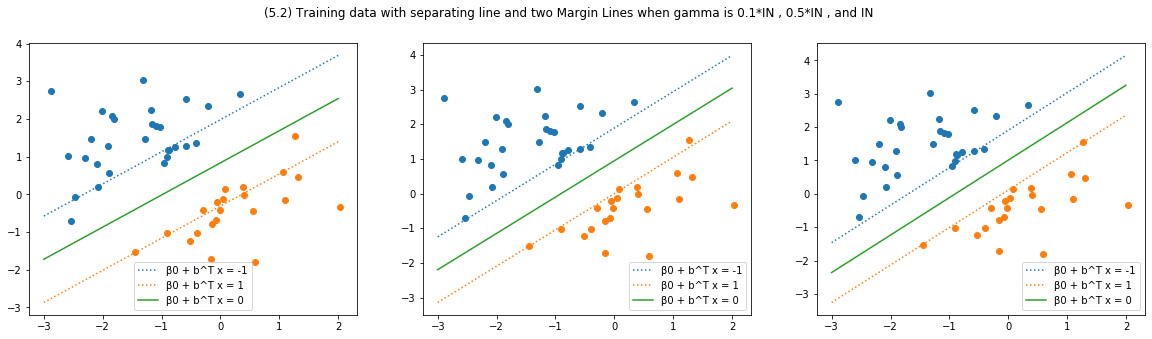

In [16]:
class_one = class2D[class2D.iloc[:,2] == -1]
class_two = class2D[class2D.iloc[:,2] == 1]

x11 = -3
x12 = 2

fig, axs = plt.subplots(1, 3,figsize=(20,5))
fig.suptitle('(5.2) Training data with separating line and two Margin Lines when gamma is 0.1*IN , 0.5*IN , and IN')
for i in range(3):
    x21_neg1 = ((-1-BETA0_2[i] - BETA_2[i][0]*x11)/BETA_2[i][1])[0]
    x22_neg1 = ((-1-BETA0_2[i] - BETA_2[i][0]*x12)/BETA_2[i][1])[0]

    x21_pos1 = ((1-BETA0_2[i] - BETA_2[i][0]*x11)/BETA_2[i][1])[0]
    x22_pos1 = ((1-BETA0_2[i] - BETA_2[i][0]*x12)/BETA_2[i][1])[0]

    x21_zero = ((-BETA0_2[i] - BETA_2[i][0]*x11)/BETA_2[i][1])[0]
    x22_zero = ((-BETA0_2[i] - BETA_2[i][0]*x12)/BETA_2[i][1])[0]

    axs[i].scatter(class_one.iloc[:,0],class_one.iloc[:,1])
    axs[i].scatter(class_two.iloc[:,0],class_two.iloc[:,1])
    axs[i].plot([x11,x12],[x21_neg1,x22_neg1],":" , label = 'β0 + b^T x = -1')
    axs[i].plot([x11,x12],[x21_pos1,x22_pos1],":", label = 'β0 + b^T x = 1')
    axs[i].plot([x11,x12],[x21_zero,x22_zero], label = 'β0 + b^T x = 0')
    axs[i].legend()